In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import data
path = r"C:\Users\suhas\Documents\cf\ch6\Data\flavors_of_cacao_cleaned.csv"
df = pd.read_csv(path)

In [4]:
# Data Overview
df.head(10)

,Manufacturer,BarName,REF,ReviewDate,CocoaPercent,Location,Rating,BeanType,BroadOrigin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Unknown,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Unknown,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Unknown,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Unknown,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Unknown,Peru
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,Unknown,Cuba
7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70.0,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70.0,France,4.00,Unknown,Peru


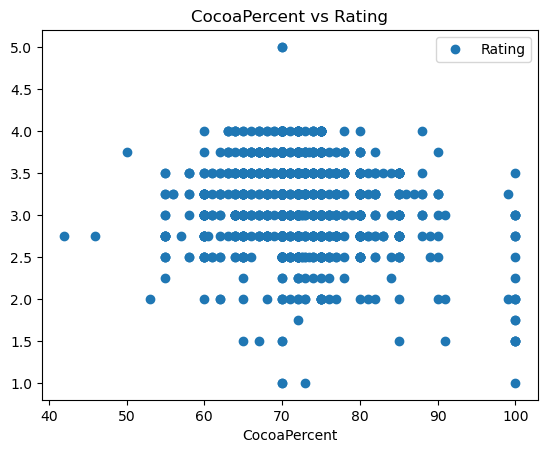

In [6]:
# Scatterplot of CocoaPercent vs Rating
df.plot(x = 'CocoaPercent', y = 'Rating', style = 'o')
plt.title('CocoaPercent vs Rating')
plt.show()

Although the data is quite discrete due to both variables taking only a few limited values, I believe there is a general inverse relationship between CocoaPercent and the bar's displayed rating

In [11]:
# Variables -> Numpy Arrays
X = df['CocoaPercent'].values.reshape(-1, 1)
y = df['Rating'].values.reshape(-1, 1)



In [12]:
# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [13]:
# Create object and fit
regression = LinearRegression().fit(X_train, y_train)

In [14]:
# Predict values
y_predict = regression.predict(X_test)

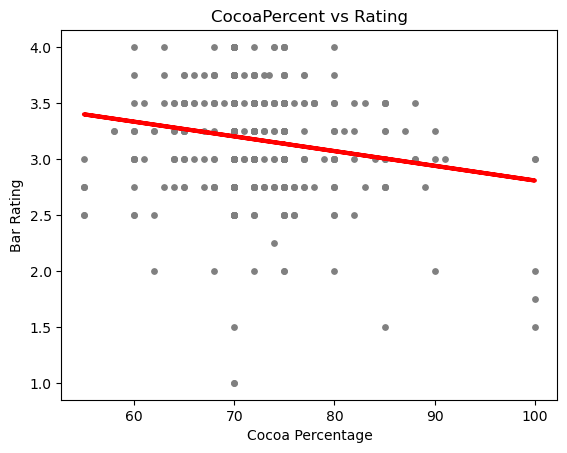

In [17]:
plot_test = plt
plot_test.scatter(X_test, y_test, color = 'grey', s=15)
plot_test.plot(X_test, y_predict, color = 'red', linewidth=3)
plot_test.title('CocoaPercent vs Rating')
plot_test.xlabel('Cocoa Percentage')
plot_test.ylabel('Bar Rating')
plot_test.show()

There appears to be a slightly weak correlation between CocoaPercent and Rating as suspected by the hypothesis. I expect that the relationship would be stronger had Rating and CocoaPercentage been continous variables rather than discrete variables, which causes a low R^2 value.

In [19]:
# Summary Statistics
mse = mean_squared_error(y_test, y_predict) 
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_predict)


print('Summary Statistics')
print('Slope:', regression.coef_)
print('Root mean squared error:', rmse)
print('R2 score:', r2)

Summary Statistics
Slope: [[-0.01313255]]
Root mean squared error: 0.4577500748391661
R2 score: 0.01811002046167487


In [21]:
# Actual vs Predicted Values
data = pd.DataFrame({'Original': y_test.flatten(), 'Predicted': y_predict.flatten()})
data.head(25)

,Original,Predicted
0,2.50,3.135457
1,2.75,3.174855
2,2.50,3.201120
3,3.25,3.201120
4,3.25,3.069794
5,2.75,3.398108
6,3.50,3.201120
7,2.50,3.135457
8,3.50,3.253650
9,3.50,3.266783


Insights from the Regression
Very Weak Relationship: The slope of -0.013 suggests that there is a weak inverse correlation between CocoaPercent and Rating.

Low R² Score: Only about 1.8% of the variance in chocolate ratings is explained by cocoa percentage. This indicates that cocoa content is not a strong predictor of rating.

High RMSE: The root mean squared error is high relative to the rating scale, implying that these predictions are not the most accurate.

Bias
Discrete Inputs: Since both variables are discrete (e.g., ratings like 3.5, 4.0 and cocoa percents like 70, 75, etc.), the regression might struggle to capture non-linear or stepwise relationships.

Sampling Bias: Ratings may reflect subjective preferences or regional rating standards. If most reviews come from certain markets or specific connoisseurs, the data may favor particular chocolate profiles (e.g., not overly bitter or sweet).

Range Issues: If most cocoa percentages fall within a narrow band (e.g., 65%–75%), the model may not detect patterns that exist at the extremes such as 100% dark chocolate vs 20%.